In [1]:
import pandas 
import numpy 
import polars 

array([[<Axes: title={'center': 'kcat'}>, <Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'kcatkm'}>]], dtype=object)

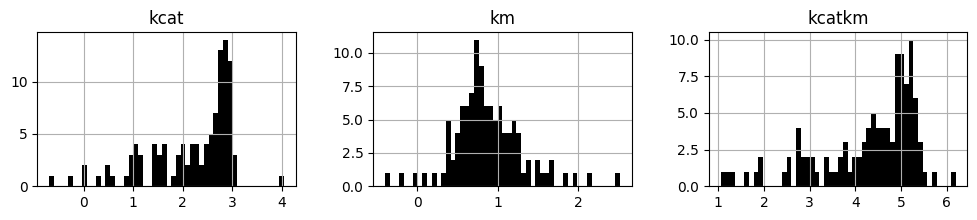

In [2]:
# bagel dataset 

df = pandas.read_csv("data/bglb_data_set.csv", index_col=0)
df = df[df["mutant_name"] != "BglB"].dropna() 

def reindex(mutation_name, offset=3):
    pos = int(mutation_name[1:-1])
    return f"{mutation_name[0]}{pos + offset}{mutation_name[-1]}"

df["mutant"] = df["mutant_name"].map(reindex)

wt = "MSENTFIFPATFMWGTSTSSYQIEGGTDEGGRTPSIWDTFCQIPGKVIGGDCGDVACDHFHHFKEDVQLMKQLGFLHYRFSVAWPRIMPAAGIINEEGLLFYEHLLDEIELAGLIPMLTLYHWDLPQWIEDEGGWTQRETIQHFKTYASVIMDRFGERINWWNTINEPYCASILGYGTGEHAPGHENWREAFTAAHHILMCHGIASNLHKEKGLTGKIGITLNMEHVDAASERPEDVAAAIRRDGFINRWFAEPLFNGKYPEDMVEWYGTYLNGLDFVQPGDMELIQQPGDFLGINYYTRSIIRSTNDASLLQVEQVHMEEPVTDMGWEIHPESFYKLLTRIEKDFSKGLPILITENGAAMRDELVNGQIEDTGRHGYIEEHLKACHRFIEEGGQLKGYFVWSFLDNFEWAWGYSKRFGIVHINYETQERTPKQSALWFKQMMAKNGF"

def mutate_sequence(wt, mutant_string):
    native = mutant_string[0]
    pos = int(mutant_string[1:-1])
    subs = mutant_string[-1]
    assert wt[pos - 1] == native, f"doesn't match: {mutant_string}"
    new_seq = list(wt)
    new_seq[pos - 1] = subs
    return "".join(new_seq)

df["sequence"] = df["mutant"].map(lambda x: mutate_sequence(wt, x))

df["kcat"] = numpy.log10(df["kcat"])
df["km"] = numpy.log10(df["km"])
df["kcatkm"] = numpy.log10(df["kcatkm"])

df.hist(layout=(1, 3), figsize=(12, 2), bins=50, color="black") 

In [3]:
df.to_csv("data/bglb_for_labeling.csv", index=False)

In [4]:
%%bash 

python predict/predict.py \
    --model-location esm2_t6_8M_UR50D \
    --sequence MSENTFIFPATFMWGTSTSSYQIEGGTDEGGRTPSIWDTFCQIPGKVIGGDCGDVACDHFHHFKEDVQLMKQLGFLHYRFSVAWPRIMPAAGIINEEGLLFYEHLLDEIELAGLIPMLTLYHWDLPQWIEDEGGWTQRETIQHFKTYASVIMDRFGERINWWNTINEPYCASILGYGTGEHAPGHENWREAFTAAHHILMCHGIASNLHKEKGLTGKIGITLNMEHVDAASERPEDVAAAIRRDGFINRWFAEPLFNGKYPEDMVEWYGTYLNGLDFVQPGDMELIQQPGDFLGINYYTRSIIRSTNDASLLQVEQVHMEEPVTDMGWEIHPESFYKLLTRIEKDFSKGLPILITENGAAMRDELVNGQIEDTGRHGYIEEHLKACHRFIEEGGQLKGYFVWSFLDNFEWAWGYSKRFGIVHINYETQERTPKQSALWFKQMMAKNGF \
    --dms-input data/bglb_for_labeling.csv \
    --offset-idx 1 \
    --dms-output data/bglb_labeled.csv \
    --scoring-strategy masked-marginals

100%|██████████| 450/450 [00:26<00:00, 17.25it/s]


<Axes: xlabel='kcat', ylabel='esm2_t6_8M_UR50D'>

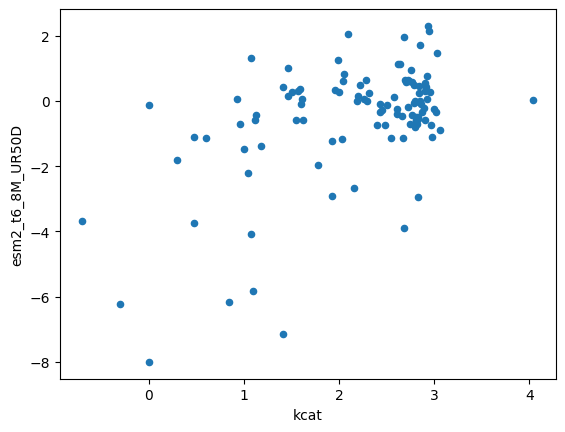

In [5]:
preds = pandas.read_csv("data/bglb_labeled.csv")

preds.plot(x="kcat", y="esm2_t6_8M_UR50D", kind="scatter")

<Axes: xlabel='km', ylabel='esm2_t6_8M_UR50D'>

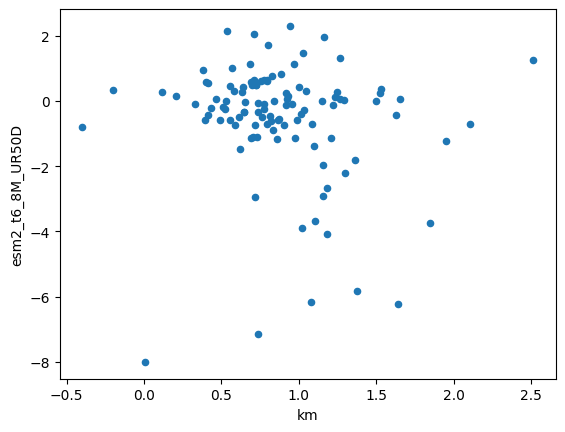

In [6]:
preds.plot(x="km", y="esm2_t6_8M_UR50D", kind="scatter")

<Axes: xlabel='kcatkm', ylabel='esm2_t6_8M_UR50D'>

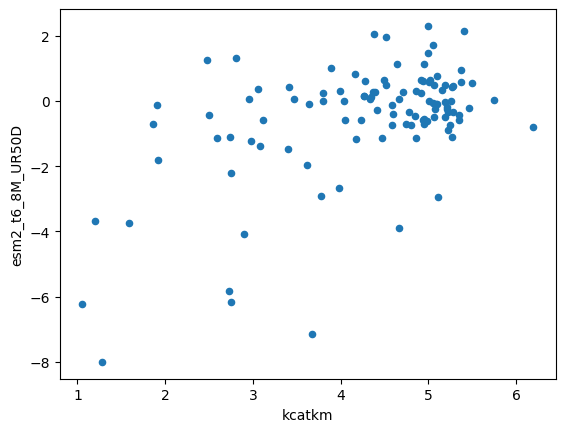

In [7]:
preds.plot(x="kcatkm", y="esm2_t6_8M_UR50D", kind="scatter")

In [8]:
df = pandas.read_csv("data/family_data_set.csv")

df.head() 

,value,mutant_name_index,kinetic_constant,rel_or_abs,scaffold
0,0.000000,0,kcat,rel,Q59976_4
1,0.000000,0,km,rel,Q59976_4
2,0.000000,0,kcatkm,rel,Q59976_4
3,0.286449,1,kcat,rel,Q59976_4
4,-2.528274,1,km,rel,Q59976_4


In [9]:
df["scaffold"].value_counts() 

scaffold
Q59976_4      66
Q97AX4_139    66
Q7MG41_142    66
P22505_16     66
Name: count, dtype: int64